# 题记

今年2月的时候开始学习台大林轩田老师的机器学习课程，感觉讲的非常好，课程的参考教材是**learning from data**，网上查阅资料的时候发现关于这本书的笔记几乎没有，所以想自己做一个学习笔记，记录教材中的习题的解法，一来可以加深自己的理解，而来也可以给后来学习的小伙伴一些参考。
这份笔记主要以**learning from data**的习题解析为主，笔记形式为Markdown以及Jupyter Notebook结合的形式。因为笔者水平有限，难免有些错误，欢迎指出。

我的github地址：  
https://github.com/Doraemonzzz

个人主页：  
http://doraemonzzz.com/


参考资料:  
https://blog.csdn.net/a1015553840/article/details/51085129  
http://www.vynguyen.net/category/study/machine-learning/page/6/  
http://book.caltech.edu/bookforum/index.php  
http://beader.me/mlnotebook/

下面进入正题，这一次讨论第一章的讨论题和课后习题。

## Chapter 1 The Learning Problem

### Part 1:Exercise

#### Exercise 1.1 (Page 4)
Express each of the following tasks in the framework of learning from data by specifying the input space $X$, output space $Y$, target function $f: X \to Y$.and the specifics of the data set that we will learn from.  

(a) Medical diagnosis: A patient walks in with a medical history and some symptoms, and you want to identify the problem.  
(b) Handwritten digit recognition (for example postal zip code recognition for mail sorting) .  
(c) Determining if an email is spam or not.  
(d) Predicting how an electric load varies with price, temperature, and day of the week.  
(e) A problem of interest to you for which there is no analytic solution,but you have data from which to construct an empirical solution 

这题考察了对learning from data框架的理解,框架可以参考课本第4页。

标识 |输入空间 |输出空间|目标函数
---|---|---|---
a|病史，症状|是否患病|判别函数(医疗资料至是否患病的映射)
b|手写数字|判别出来的数字|判别函数(手写数字至数字的映射)
c|邮件内容|是否为垃圾邮件|判别函数(邮件内容至是否为垃圾邮件的映射)
d|电力负载量，电力价格，温度，日期|电量的预测|预测函数
e|数据|处理结果|经验解决方案(empirical solution)

#### Exercise 1.2 (Page 6)
Suppose that we use a perceptron to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of
keywords, and the output is if the message is considered spam.  

(a) Can you think of some keywords that will end up with a large positive weight in the perceptron?  
(b) How about keywords that will get a negative weight?  
(c) What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?

这题考察了感知机的一些概念。

(a) 哪些关键字在感知机的模型中有较大权重？
免费，打折，钱等

(b) 哪些关键字在感知机的模型中有负的权重？
显然是和垃圾邮件无关的，例如工作，开会，作业等

(c) 感知机中哪些参数直接影响了边界信息最终被分类为垃圾邮件?
这里回顾下感知机模型:
$$
h(x)=sign((\sum_{i=1}^{d}w_ix_i)+b)
$$
所以这里直接影响的参数为$w_i(i=1,2...d)$以及$b$

#### Exercise 1.3 (Page 8)
The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying x(t) correctly.  

(a) Show that $y(t)w^T(t)x(t) < 0$. [Hint: $x(t)$ is misclassifed by $w(t)$.]  
(b) Show that $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$. [Hint: Use (1.3).]  
(c) As far as classifying $x(t)$ is concerned, argue that the move from $w(t)$ to $w(t + 1)$ is a move 'in the right direction ' . 

这里先对之前的感知机模型稍作变形，令$w_0=b,x_0=1$，那么
$$
h(x)=sign((\sum_{i=1}^{d}w_ix_i)+b)
$$
可以变形为:
$$ 
h(x)=sign((\sum_{i=0}^{d}w_ix_i))=sign(w^T(t)x(t))
$$
接着给出式(1.3)
$$
对于y(t)\ne
sign(w^T(t)x(t))的数据, 更新规则是
w(t + 1) = w(t) + y(t)x(t) 
$$

(a) 因为$y(t)\ne sign(w^T(t)x(t))$，所以当$sign(w^T(t)x(t))>0 $时，$y(t)=-1$，
当$sign(w^T(t)x(t))<0 $时，$y(t)=1$，所以$y(t)w^T(t)x(t) < 0$  

(b)
$$
y(t)w^T(t+1)x(t)=y(t)(w(t) + y(t)x(t))x(t)=y(t)w^T(t)x(t)+y^2(t)x^T(t)x(t)
$$
注意$x(t)$的第一个分量为$1$(参考课本)，所以$y^2(t)x^T(t)x(t)>0$，因此
$$
y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t)
$$

(c) 由(1)我们知道，如果分类错误，那么$y(t)w^T(t)x(t) < 0$，但利用(1.3)跟新之后，$y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t)$，也就是向着正方向前进了，所以如果资料是可分的，那么经过有限步之后得到$w$,可以使得所有的$x$,$yw^Tx>0$ 

#### Exercise 1.4 (Page 8)
Let us create our own target function $f$ and data set $D$ and see how the perceptron learning algorithm works. Take d = 2 so you can visualize the problem, and choose a random line in the plane as your target function,where one side of the line maps to 1 and the other maps to -1. Choose the inputs $X_n$ of the data set as random points in the plane, and evaluate the target function on each $X_n$ to get the corresponding output $Y_n$.  
Now, generate a data set of size 20. Try the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis g matches your target $f$. You can find other ways to play with this experiment in Problem 1.4.

这题是对感知机模型编程实现一下，这里使用了Python

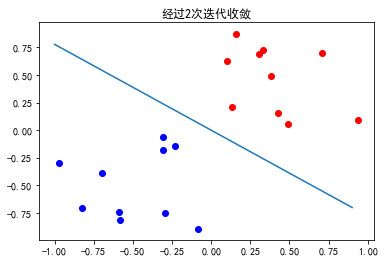

In [2]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#首先生成20个可分的数据，为方便起见，分别生成10个第一象限的点和10个第三象限的点
#第一象限10个点
X1=[]
Y1=[]
#第三象限10个点
X2=[]
Y2=[]
for i in range(10):
    X1.append(random.uniform(0,1))
    Y1.append(random.uniform(0,1))
    X2.append(random.uniform(-1,0))
    Y2.append(random.uniform(-1,0))
    
#给数据打标记,第一象限的标记为1，第三象限的标记为-1,注意添加第一个分量为1
data1=[np.array([1,X1[i],Y1[i],1]) for i in range(10)]
data2=[np.array([1,X2[i],Y2[i],-1]) for i in range(10)]
data=data1+data2

#定义sign函数
def sign(x):
    if x>=0:
        return 1
    else:
        return -1
    
#定义判别函数，判断所有数据是否分类完成
def Judge(x,w):
    flag=1
    for i in x:
        if sign(i[:3].dot(w))*i[-1]<0:
            flag=0
            break
    return flag    

#记录次数
s=0
#初始化w=[0,0]
w=np.array([0,0,0],dtype=float)
while (Judge(data,w)==0):
    for i in data:
        if sign(i[:3].dot(w))*i[-1]<0:
            w+=i[-1]*i[:3]
            s+=1
            
#直线方程为w0+w1*x+w2*y=0,根据此生成点
X3=np.arange(-1,1,0.1)
Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

#画出图片
plt.scatter(X1,Y1,c='r')
plt.scatter(X2,Y2,c='b')
plt.plot(X3,Y3)
plt.title(u"经过"+str(s)+u"次迭代收敛")
plt.show()

#### Exercise 1.5 (Page 11)
Which of the following problems are more suited for the learning approach and which are more suited for the design approach?  

(a) Determining the age at which a particular medical test should be performed  
(b) Classifying numbers into primes and non-primes  
(c) Detecting potential fraud in credit card charges  
(d) Determining the time it would take a falling object to hit the ground  
(e) Determining the optimal cycle for traffic lights in a busy intersection

learning approach是指机器学习的方法，design approach是指推导的方法，适合能够直接分析推导的问题

标识 |适合的方式
---|---
a|learning approach
b|design approach
c|learning approach
d|design approach
e|learning approach

质数和自由落体问题可以直接得出结果，所以使用design approach

#### Exercise 1.6 (Page 14)
For each of the following tasks, identify which type of learning is involved (supervised, reinforcement, or unsupervised) and the training data to be used. If a task can fit more than one type, explain how and describe the training data for each type.  

(a) Recommending a book to a user in an online bookstore  
(b) Playing tic tac toe  
(c) Categorizing movies into different types  
(d) Learning to play music  
(e) Credit limit: Deciding the maximum allowed debt for each bank customer

(a) 推荐系统的问题，监督学习  
(b) 游戏输赢是确定的，所以是监督学习，然后学习的过程是强化学习  
(c) 标准的分类问题，监督学习  
(d) 学习音乐的结果没有直接标志，非监督学习，然后学习的过程是强化学习  
(e) 标准的预测问题，监督学习  

#### Exercise 1.7 (Page 17)
For each of the following learning scenarios in the above problem, evaluate the performance of $g$ on the three points in $X$ outside $D$. To measure the performance, compute how many of the 8 possible target functions agree with $g$ on all three points, on two of them, on one of them, and on none of them.  

(a) $H$ has only two hypotheses, one that always returns ' $•$' and one that always returns '$o$'. The learning algorithm picks the hypothesis that matches the data set the most.  
(b) The same $H$, but the learning algorithm now picks the hypothesis that matches the data set the least.  
(c) $H = \{XOR\}$ (only one hypothesis which is always picked), where $XOR$ is defined by $XOR(x) = •$ if the number of $1$'s in x is odd and
$XOR(x) = o$ if the num ber is even.  
(d) $H$ contains all possible hypotheses (all Boolean functions on three variables), and the learning algorithm picks the hypothesis that agrees with all training examples, but otherwise disagrees the most with the $XOR$.

![](https://github.com/Doraemonzzz/markdown-photo/blob/learning-from-data/C1E7.png?raw=true)

先看下题目的背景，给定$5$组训练数据和结果，让我们预测其余$3$组数据的表现结果，现在假设在$5$组数据上全部正确，那么一共就有$2^3$种可能的函数，如上图所示。
现在题目分别给出$4$种假设空间和学习算法，这样可以得到结果$g$,我们需要给出和$g$在$3$个点均一致，$2$个点一致，$1$个点一致的的函数。

(a) 假设空间为全$o$以及全$•$，学习的算法是取和训练数据集符合程度最多的假设，显然全$•$在$5$组训练数据上有$3$组正确，全$o$只有$2$组正确，所以这里取全$•$  

(b) 假设空间为全$o$以及全$•$，学习的算法是取和训练数据集符合程度最少的假设，所以这里取全$o$  

(c) 这里的假设空间只有一个元素，有奇数个$1$则取$•$，否则取$o$  

(d) 这里的假设空间是所有假设，学习算法是在训练数据上结果全部正确，但是在预测数据上和$XOR$不符合度最高的的假设，因此这里取和条件c结果完全相反的结果  

x |条件a下的g|条件b下的g|条件c下的g|条件d下的g
---|---|---|---|---|---
$1 0 1$|$•$|$o$|$o$|$•$
$1 1 0$|$•$|$o$|$o$|$•$
$1 1 1$|$•$|$o$|$•$|$o$

所以题目的答案如下:

假设 |3个点相同的函数|2个点相同的函数|1个点相同的函数
---|---|---|---
a|$f_8$|$f_4,f_6,f_7$|$f_2,f_3,f_5$
b|$f_1$|$f_2,f_3,f_5$|$f_4,f_6,f_7$
c|$f_2$|$f_1,f_4,f_6$|$f_3,f_5,f_8$
d|$f_7$|$f_3,f_5,f_8$|$f_1,f_4,f_6$

#### Exercise 1.8 (Page 19)
*If µ = 0 .9, what is the probability that a sample of 10 marbles will have v$\le$0.1? [Hints: 1. Use binomial distribution. 2. The answer is a very small number.]*

二项分布的题目，盒子例一共有两种球，90%是红球，10%是绿球，现在取10个，问红球树小于等于1的概率。
$$
P=0.1^{10}+C^{1}_{10}\times 0.1^{9}\times 0.9 \approx  9\times 10^{-9}
$$

#### Exercise 1.9 (Page 19)
*If µ = 0 .9, use the Hoeffding Inequality to bound the probability that a sample of 10 marbles will have v$\le$0.1 and compare the answer to the previous exercise.*

回顾下$Hoeffding$不等式:
$$
P[| \mu-v|>\epsilon]\le 2e^{-2\epsilon ^2N}
$$
因此
$$
P[v\le 0.1]=P[0.9-v\ge 0.8]=P[\mu-v\ge 0.8]\le P[|\mu-v|\ge 0.8]\le 2e^{-2\times 0.8^2\times 10}\approx5.5215451440744015\times 10^{-6}
$$
这个比习题1.8的上界更松，因为Hoeffding不等式是通用的，所以上界肯定会更宽松一些

#### Exercise 1.10 (Page 23)
Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1000 fair coins.Flip each coin independently times. Let's focus on 3 coins as fllows:  
$c_1$ is the first coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_1 , v_{rand}$ and $v_{min}$ be the fraction of heads you obtain for the respective three coins.  

(a) What is µ for the three coins selected?  
(b) Repeat this entire experiment a large number of times (e.g. , 100, 000 runs of the entire experiment) to get several instances of $v_1 , v_{rand}$ and $v_{min}$ and plot the histograms of the distributions of $v_1 , v_{rand}$ and $v_{min}$. Notice that which coins end up being $c_{rand}$ and $c_{min}$ may differ from one run to another.  
(c) Using (b), plot estimates for $P[|\mu-v|>\epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2e^{-2\epsilon ^2N}$ (on the same graph) .  
(d) Which coins obey the Hoeffding bound, and which ones do not? Explain why.  
(e) Relate part (d) to the multiple bins in Figure 1.10

介绍下这题的背景,先定义几个概念:
$$
E_{in}(h)=(faction\ of\ D\ where\ f\ and\ h\ disagree)
\\ =\frac 1N \sum_{i=1}^{n}[\![h(x_n)\neq  f(x_n)]\!],
$$
$$
E_{out}(h)=P[\![h(x)\neq  f(x)]\!]
$$
这里$f$是原假设,$h$是我们得到的假设，其次：
$$
[\![statement]\!]= 1\ if\ the\ statement\ is\ true
$$
$$
[\![statement]\!]= 0\ if\ the\ statement \ is\ false
$$
$E_{in}(h)$就是我们得到的假设和目标假设在训练集上的误差，$E_{out}(h)$是实际误差，所以$E_{out}(h)$相当于$Hoeffding$不等式中的$\mu$,$E_{in}(h)$相当于$Hoeffding$不等式中的$v$。
因此：
$$
P[|E_{in}(h)-E_{out}(h）|>\epsilon]\le 2e^{-2\epsilon ^2N}
$$
所以如果数据量够大，$E_{in}(h)$和$E_{out}(h)$的差距会越来越小。但之前的情况都是只有一个假设，如果只有一个假设，也就不需要学习了，所以这里考虑了一系列假设$H=\{h_1,h_2,...,h_M\}$，我们要从中挑选一个比较好的假设$g$。
这题希望解释的就是我们不能得出:
$$
P[|E_{in}(g)-E_{out}(g)|>\epsilon]\le 2e^{-2\epsilon ^2N}
$$
实际上我们只能得出:
$$
P[|E_{in}(g)-E_{out}(g)|>\epsilon]\le 2M e^{-2\epsilon ^2N}
$$
更细节的部分可以参考书本。

回到原题，$v_1,v_{rand},v_{min}$分别是第一个抛的硬币，随机抽取的硬币，抛十次之后得到正面数量最少的硬币（如果这样的硬币有多个，则取次序最前面的一个硬币）在十次投掷中正面的比例，$\mu$是抛以上三种硬币得到正面的概率。  

(a) 因为硬币是公平的，所以$\mu=0.5$  

(b) 首先根据题目要求模拟结果:

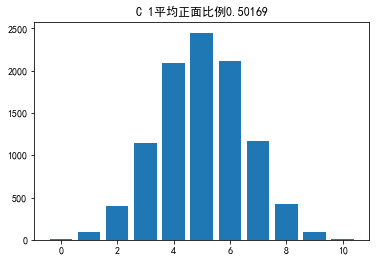

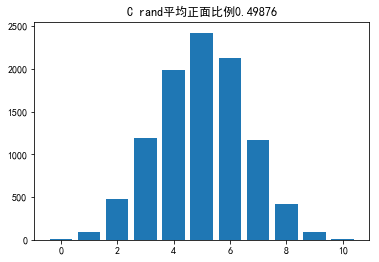

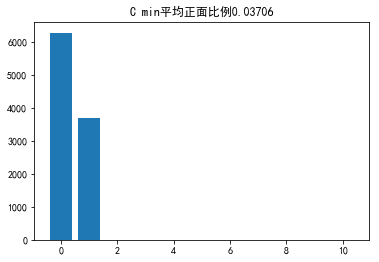

In [1]:
# -*- coding: utf-8 -*-

import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#首先模拟一次实验的结果,n表示硬币数量
def simu(n):
    #n个硬币
    X=[[] for i in range (n)]
    #记录正面硬币数最小值
    m=n
    for i in range(n):
        for j in range(10):
            #利用0,1随机树模拟,1表示正面,0表示反面
            X[i].append(random.randint(0,1))
        #最后一个元素记录正面数
        fra=sum(X[i])
        X[i].append(fra)
        if(fra<m):
            m=fra
    #第一个元素
    y1=X[0][-1]
    #随机元素
    y2=X[random.randint(0,n-1)][-1]
    #最小值
    y3=m
    return y1,y2,y3

#记录正面硬币得分的具体情况，存入一个长度为11的列表，第i个元素表示得分为i的次数
Y1=[0]*11
Y2=[0]*11
Y3=[0]*11
n=1000
for i in range(10000):
    y1,y2,y3=simu(n)
    Y1[y1]+=1
    Y2[y2]+=1
    Y3[y3]+=1

#计算正面的次数
def total(x):
    s=0
    for i in range(len(x)):
        s+=i*x[i]
    return s

#作图
plt.bar(range(11),Y1)
plt.title(u'C 1平均正面比例'+str(total(Y1)/100000.0))
plt.show()

plt.bar(range(11),Y2)
plt.title(u'C rand平均正面比例'+str(total(Y2)/100000.0))
plt.show()

plt.bar(range(11),Y3)
plt.title(u'C min平均正面比例'+str(total(Y3)/100000.0))
plt.show()

不出意外,$v_1,v_{rand}$的平均得分率为$0.5$左右,而$v_{min}$的平均得分率较低。事实上，我们可以求出$E(v_{min})$,这里来分析一下：
这里有$1000$个得分率样本$X_1,X_2,...,X_{1000}$，所以这里
$$
E(v_{min})=E(min(X_1,X_2,...,X_{1000}))
$$
下面计算数学期望,首先给出分布函数：
$$
P(v_{min}\le \frac k{10})=1-P(v_{min}\ge \frac{k+1}{10})
\\ =1-P(min(X_1,X_2,...,X_{1000})\ge \frac{k+1}{10})
\\ =1-(\sum_{i=k+1}^{10}C_{10}^i(\frac1 2)^{10})^{1000}
$$
所以：
$$
P(v_{min}=\frac k{10})=P(v_{min}\le \frac k{10})-P(v_{min}\le \frac {k-1}{10})
\\ =1-(\sum_{i=k+1}^{10}C_{10}^i(\frac1 2)^{10})^{1000}-[1-(\sum_{i=k}^{10}C_{10}^i(\frac1 2)^{10})^{1000}]
\\ =(\sum_{i=k}^{10}C_{10}^i(\frac1 2)^{10})^{1000}-(\sum_{i=k+1}^{10}C_{10}^i(\frac1 2)^{10})^{1000}
$$
因此：
$$
E(v_{min})=\sum_{k=0}^{10}\frac k{10}\times P(v_{min}=k)
\\ =\sum_{k=0}^{10}\frac k{10}\times[(\sum_{i=k}^{10}C_{10}^i(\frac1 2)^{10})^{1000}-(\sum_{i=k+1}^{10}C_{10}^i(\frac1 2)^{10})^{1000}]
$$
这里使用Python计算结果，最后得到$\mu\approx0.037644419141365526$，可以看到和之前模拟的结果一致

In [5]:
from scipy.special import comb

#P(v<=k),n表示一共几个硬币
def f(k,n):
    s=0
    for i in range(k+1,11):
        s+=comb(10,i)/(2**10)
    return 1-s**n

#P(v=k)
def g(k,n):
    return f(k,n)-f(k-1,n)

def h(n):
    s=0
    for k in range(11):
        s+=k/10.0*g(k,n)
    return s

print(h(1000))
#0.03764441914136553

0.0376444191414


(c)  这里根据上述的结果作图

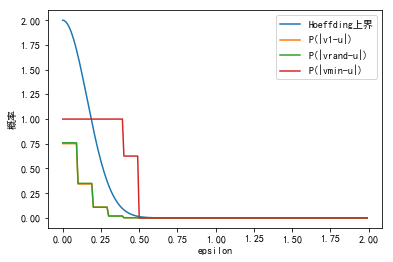

In [6]:
import math
import numpy as np

epsilon=np.arange(0,2,0.01)

Z1=np.zeros(len(epsilon))
Z2=np.zeros(len(epsilon))
Z3=np.zeros(len(epsilon))

#计算P(|u-v|>epsilon)
for i in range(len(epsilon)):
    for j in range(11):
        if abs((j-5)/10.0)>epsilon[i]:
            Z1[i]+=Y1[j]
            Z2[i]+=Y2[j]
            Z3[i]+=Y3[j]
Z1=Z1/10000
Z2=Z2/10000
Z3=Z3/10000

#Hoeffding上界值
Z=np.array([2*math.exp(-2*(i**2)*10) for i in epsilon])

#作图
plt.plot(epsilon,Z,label=u"Hoeffding上界")
plt.plot(epsilon,Z1,label=u"P(|v1-u|)")
plt.plot(epsilon,Z2,label=u"P(|vrand-u|)")
plt.plot(epsilon,Z3,label=u"P(|vmin-u|)")
plt.xlabel(u'epsilon')
plt.ylabel(u'概率')
plt.legend()
plt.show()

(d) 可以看到计算出来的$P(|v_{min}-\mu|>\epsilon)$比$Hoeffding$上界值大，所以$v_{min}$违背了$Hoeffding$不等式

#### Exercise 1.11 (Page 25)
We are given a data set $D$ of 25 training examples from an unknown target function $f:X\to Y$, where $X=R$ and $Y$= {-1, +1}. To learn $f$, we use a simple hypothesis set = ${h_1, h_2}$ where $h_1$ is the constant +1 function and $h_2$ is the constant -1.

We consider two learning algorithms, $S$ (smart) and $C$ (crazy). $S$ chooses the hypothesis that agrees the most with $D$ and $C$ chooses the other hypothesis deliberately. Let us see how these algorithms perfrm out of sample from the deterministic and probabilistic points of view. Assume in the probabilistic view that there is a probability distribution on $X$ , and let $P[f(x) =+1] = p$.  

(a) Can S produce a hypothesis that is guaranteed to perform better than random on any point outside $D$?  
(b) Assume for the rest of the exercise that all the examples in $D$ have $Y_n = +1$. Is it possible that the $C$ hypothesis that produces turns out to be better than the hypothesis that $S$ produces?  
(c) If $p = 0.9$, what is the probability that $S$ will produce a better hypothesis than $C$?  
(d) Is there any value of $p$ for which it is more likely than not that $C$ will produce a better hypothesis than $S$? 

(a) 利用S算法会选择在训练集上效果较好的假设，但是并不能保证在训练集以外的部分表现的很好  

(b) 这题及之后的习题假设在训练集上的$Y_n = +1$均为1，利用C算法得到的假设在训练集上的准确率为0，利用D算法的假设在训练集上的准确率为1，在训练集以外的部分S算法得到的假设仍然有可能比D算法得到的假设表现好  

(c) 令$S$产生的结果为$f_s$,$C$产生的结果为$f_c$，需要求得的概率为$P(P(f_s=f)>P(f_c=f))$  
由$S,C$的特点我们知道$P(f_s=f)=0.9,P(f_c=f)=0.1$，因为$f_s(x)$恒等于1,$P[f(x) =+1] = 0.9$，所以$P(f_s=f)=0.9$,同理$P(f_c=f)=0.1$  
所以$P(P(f_s=f)>P(f_c=f))=P(0.9>0.1)=1$  

(d) 这题是上题的一般化结果,题目实际上问的是是否存在$p$,使得$P(P(f_s=f)>P(f_c=f))<0.5?$  
因为
$$
P[f(x) =+1] = p
$$
所以
$$
P(f_s=f)=p,P(f_c=f)=1-p,    
P(P(f_s=f)>P(f_c=f))=P(p>1-p)
$$
所以当$p<0.5$时，$P(P(f_s=f)>P(f_c=f))=P(p>1-p)=0$  
因此本题结果为$p<0.5$

#### Exercise 1.12 (Page 26)
A friend comes to you with a learning problem. She says the target function is completely unknown, but she has 4, 000 data points. She is willing to pay you to solve her problem and produce for her a $g$ which approximates  $f$. What is the best that you can promise her among the following:  

(a) After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.  
(b) After learning you will provide her with a $g$,and with high probability the $g$ which you produce will approximate $f$ well out of sample.  
(c) One of two things will happen.  
&emsp;(i) You will produce a hypothesis $g$;  
&emsp;(ii) You will declare that you failed .  
&emsp;If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate well out of sample.

这里选(c),因为不能保证学习出一个比较好的假设

#### Exercise 1.13 (Page 31)
Consider the bin model for a hypothesis $h$ that makes an error with probability $\mu$ in approximating a deterministic target function $f$(both $h$ and $f$ are binary functions).If we use the same $h$ to approximate a noisy version of $f$ given by
$$
P(y|x)=\begin{cases}
\lambda & y = f(x)
\\ 1-\lambda & y\ne f(x)
\end{cases}
$$  

(a) What is the probability of error that $h$ makes in approximating $y$?  
(b) At what value of $\lambda$ will the perfrmance of $h$ be independent of $\mu$?  
&emsp;[Hint: The noisy target will look completely random.]

(a)错误有两种，一种是“去真”:$\lambda\mu$，另一种是“取伪”：$(1-\lambda)(1-\mu)$，所以犯错的概率一共$\lambda\mu+(1-\lambda)(1-\mu)$  

(b)
$$
P=\lambda\mu+(1-\lambda)(1-\mu)=\lambda\mu+1-\mu-\lambda+\lambda\mu=1-\lambda+(2\lambda-1)\mu
$$
所以当$\lambda=\frac 1 2$，$P=1-\lambda$，因此和$\mu$独立

### Part 2:Problems

#### Problem 1.1 (Page 33)
We have 2 opaque bags, each containing 2 balls. One bag has 2 black balls and the other has a black and a white ball . You pick a bag at random and then pick one of the balls in that bag at random. When you look at the ball it is black. You now pick the second ball from that same bag.What is the probability that this ball is also black? 
Hint: Use Bayes' Theorem:$P[A\ and\ B] = P[A | B] P [B] = P[B | A] P[A]$ 

这题还是比较基础的，有两个包，一个包里有两个黑球，另一个包里有一个黑球和一个白球，先随机取一个包，再随机从这个包里随机取一个球，当发现第一取出的球是黑球时，再从这个包里再取一次球，现在问第二次取出的球也是黑色的概率?  
$$
P=\frac 1 2 \times 1\times 1+\frac 1 2\times \frac 1 2\times 0=\frac 1 2
$$

#### Problem 1.2 (Page 33)
Consider the perceptron in two dimensions: $h(x)=sign(w^Tx)$ where $w = [w_0 , w_1 , w_2]^T$ and $x = [1, x_1 , x_2 ]^T$. Technically, $x$ has three coordinates, but we call this perceptron two-dimensional because the first coordinate is fixed at 1 .  
(a) Show that the regions on the plane where $h(x) = + 1$ and $h(x) = - 1$ are separated by a line. If we express this line by the equation $x_2 = ax_1 + b$,what are the slope $a$ and intercept $b$ in terms of $w_0 , w_1 , w_2$?  
(b) Draw a picture for the cases $w = [1, 2, 3]^T$ and $w = - [1 , 2, 3]^T$.  
In more than two dimensions, the +1 and - 1 regions are separated by a hyperplane, the generalization of a line.

(a) 由解析几何知识，$w^Tx=0$直线的一侧每个点$w^Tx>0$，另一侧的每个点$w^Tx<0$，因此$h(x)=+1$和$ h(x)=−1$被一条直线所分开。  
直线方程为
$$
w^Tx=w_0+w_1x_1+w_2x_2=0 
$$
所以当$w_2\ne 0$时
$$
x_2=-\frac {w_0}{w_2}-\frac{w_1}{w_2}x_1
$$

(b)用Python作图

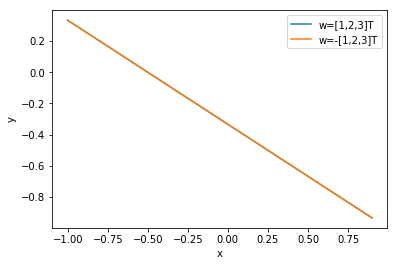

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(-1,1,0.1)
y1=np.array([-1/3-2/3*i for i in x])
y2=np.array([-1/3-2/3*i for i in x])
plt.plot(x,y1,label='w=[1,2,3]T')
plt.plot(x,y2,label='w=-[1,2,3]T')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

可以看到两条直线重合，这是由
$x_2=-\frac {w_0}{w_2}-\frac{w_1}{w_2}x_1$所决定的

#### Problem 1.3 (Page 33)
Prove that the PLA eventually converges to a linear separator for separable data. The following steps will guide you through the proof. Let $w*$ be an optimal set of weights (one which separates the data).The essential idea in this proof is to show that the PLA weights $w(t$) get "more aligned" with $w^*$ with every iteration . For simplicity, assume that $w(0) = 0$.  

(a) Let $\rho = {min}_{1\le n\le N} y_n(w^{*T} x_n )$ . Show that $\rho > 0$.  

(b) Show that $w^T (t)w^*\ge w^T(t- 1)w^*+\rho$, and conclude that $w^T(t)w^* \ge t\rho$.[Hint: Use induction.]  

(c) Show that $||w (t) ||^2 \le  ||w(t - 1) ||^2 + ||x(t - 1) ||^2.$  
[Hint: $y(t - 1) · (w^T(t - l)x(t - 1)) \le 0$ because $x(t - 1)$ was misclassified by $w (t - 1 )$].  

(d) Show by induction that $||w(t) ||^2 \le tR^2$ , where$ R = {max}_{1\le n\le N} ||xn ||$ ·  

(e) Using (b) and (d), show that 
$$
\frac {w (t)} {||w(t)||}w^*\ge \sqrt{t}\frac \rho R
$$
and hence prove that
$$
t\le \frac {R^2||w^*||^2} {\rho^2}
$$
[Hint: $\frac {w (t)w^*} {||w(t)||\ ||w^*||}\le 1$ . Why?]  
In practice, PLA converges more quickly than the bound $\frac {R^2||w^*||^2} {\rho^2}$ suggests.Nevertheless, because we do not know $\rho$ in advance, we can 't determine the number of iterations to convergence, which does pose a problem if the data is non-separable.

(a) 因为可分,所以$\forall\ n(1\le n \le N)，y_n(w^{*T} x_n )>0$，然后因为$N$有限，所以$\rho = {min}_{1\le n\le N} y_n(w^{*T} x_n )>0$

(b)先回顾下更新规则:
$$
对于y(t)\ne
sign(w^T(t)x(t))的数据, 更新规则是
w(t + 1) = w(t) + y(t)x(t) 
$$
因此
$$
w^T (t)w^*=(w^T (t-1)+y(t)x^T(t))w^*=w^T (t-1)w^*+y(t)x^T(t)w^*=w^T (t-1)w^*+y(t)x(t)w^{*T}\ge w^T(t- 1)w^*+\rho
$$
这里$y(t)x^T(t)w^*=y(t)x(t)w^{*T}$是因为$x^T(t)w^*$是一个实数，所以它的转置$x(t)w^{*T}$等于它本身，最后一步是因为$y(t)x(t)w^{*T}\ge {min}_{1\le n\le N} y_n(w^{*T} x_n )=\rho$

再来证明 $w^T(t)w^* \ge t\rho$，利用数学归纳法
$t=0$时,$w^T(t)w^*=w^T(0)w^*=0,t\rho=0$，因此$t=0$时结论成立  
假设$t=k$时结论成立，$t=k+1$时，由之前证明的结论知
$$
w^T (k+1)w^*\ge w^T(k)w^*+\rho\ge k\rho +\rho=(k+1)\rho
$$
所以$t=k+1$时结论成立

(c)对$w(t + 1) = w(t) + y(t)x(t)$两边取模的平方，注意这里$||x||=x^Tx,x\in R^n$
$$
||w(t + 1)||^2 = ||w(t) + y(t)x(t)||^2
\\ =(w(t) + y(t)x(t))^T(w(t) + y(t)x(t))
\\ =w^T(t)w(t)+y(t)x^T(t)w(t)+w^T(t)y(t)x(t)+y(t)x^T(t)y(t)x(t)
$$
注意到实数的转置等于其本身,$y(t)=\pm 1$，可得
$$
y(t)x^T(t)w(t)=w^T(t)y(t)x(t)
\\ y(t)x^T(t)y(t)x(t)=y^2(t)x^T(t)x(t)=x^T(t)x(t)
$$
所以
$$
||w(t + 1)||^2 =w^T(t)w(t)+2y(t)x^T(t)w(t)+x^T(t)x(t)
\\ = ||w(t) ||^2 + ||x(t) ||^2+2y(t)x^T(t)w(t)
$$
因为误分，所以$y(t)x^T(t)w(t)\le0$  
因此
$$
||w(t + 1)||^2  = ||w(t) ||^2 + ||x(t) ||^2+2y(t)x^T(t)w(t)
\\ \le||w(t) ||^2 + ||x(t) ||^2
$$

(d)利用数学归纳法，注意$w(0)=0$  
当$t=1$时，由(e)知$||w(1) ||^2\le||w(0) ||^2 + ||x(0) ||^2\le R^2$  
假设$t=k$时结论成立，当$t=k+1$时：
$$
||w(t+1) ||^2\le||w(t) ||^2 + ||x(t) ||^2\le tR^2+R^2=(t+1)R^2
$$
因此$t=k+1$时结论成立  

(e)由(d)知$||w(t) ||^2 \le tR^2$，所以$||w(t) || \le \sqrt tR$
由(b)知$w^T(t)w^* \ge t\rho$，所以
$$
\frac {w^T(t)w^*}{||w(t) ||} \ge \frac {t\rho} {\sqrt tR}=\sqrt t \frac {\rho}R
$$
由$Cauthy-Schwarz$不等式知
$$
w^T(t)w^*\le ||w(t) ||\ ||w^*||
$$
因此
$$
\sqrt t \frac {\rho}R\le||w^*||
\\ t\le \frac {||w^*||^2R^2}{\rho^2}
$$
这意味着$t$是一个有限的数，所以$PLA$一定会收敛

#### Problem 1.4 (Page 34） 
In Exercise 1.4, we use an artificial data set to study the perceptron learning algorithm . This problem leads you to explore the algorithm
further with data sets of different sizes and dimensions.

(a) Generate a linearly separable data set of size 20 as indicated in Exercise 1.4. Plot the examples $\{ (x_n , y_n) \}$ as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently,
and add labels to the axes of the plot.  
(b) Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples $\{ (x_n , y_n) \}$ , the target function f, and the final hypothesis g in the same figure. Comment on whether f is close to g.  
(c) Repeat everything in (b) with another randomly generated data set of size 20. Compare your results with (b) .  
(d) Repeat everything in (b) with another randomly generated data set of size 100. Compare your results with (b) .  
(e) Repeat everything in (b) with another randomly generated data set of size 1, 000. Compare your results with (b) .  
(f) Modify the  algorithm such that it takes $x_n\in R^{10}$ instead of $R^2$ . Randomly generate a linearly separable data set of size 1, 000 with $x_n\in R^{10}$ and feed the data set to the algorithm. How many updates does the algorithm take to converge?  
(g) Repeat the algorithm on the same data set as (f) for 100 experiments. In the iterations of each experiment, pick $x(t)$ randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge.  
(h) Summarize your conclusions with respect to accuracy and running time as a function of $N$ and $d$.

(a)(b)(c)这三题和Exercise 1.4基本一致，稍微不同的是需要画出目标函数f以及更新次数

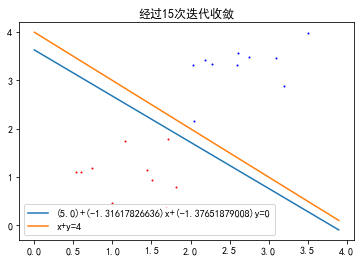

In [39]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#定义2n组数据的函数为f(n)
def f(n):
    #首先生成2n个可分的数据，生成两组，每一组有n个点，第一组点的每个分量属于[0,2],第二组点的每个分量属于[2,4],目标函数取x+y=4
    #第一组n个点
    X1=[]
    Y1=[]
    #第二组n个点
    X2=[]
    Y2=[]
    for i in range(n):
        X1.append(random.uniform(0,2))
        Y1.append(random.uniform(0,2))
        X2.append(random.uniform(2,4))
        Y2.append(random.uniform(2,4))

    #给数据打标记,第一象限的标记为1，第三象限的标记为-1,注意添加第一个分量为1
    data1=[np.array([1,X1[i],Y1[i],1]) for i in range(n)]
    data2=[np.array([1,X2[i],Y2[i],-1]) for i in range(n)]
    data=data1+data2
    random.shuffle(data)

    #定义sign函数
    def sign(x):
        if x>=0:
            return 1
        else:
            return -1

    #定义判别函数，判断所有数据是否分类完成
    def Judge(x,w):
        flag=1
        for i in x:
            if sign(i[:3].dot(w))*i[-1]<0:
                flag=0
                break
        return flag    

    #记录次数
    s=0
    #初始化w=[0,0]
    w=np.array([0,0,0],dtype=float)
    while (Judge(data,w)==0):
        i=data[random.randint(0,2*n-1)]
        if sign(i[:3].dot(w))*i[-1]<0:
            w+=i[-1]*i[:3]
            s+=1

    #直线方程为w0+w1*x+w2*y=0,根据此生成点
    X3=np.arange(0,4,0.1)
    Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

    #目标函数为x+y=4
    X4=np.arange(0,4,0.1)
    Y4=4-X4

    #画出图片
    plt.scatter(X1,Y1,c='r',s=1)
    plt.scatter(X2,Y2,c='b',s=1)
    plt.plot(X3,Y3,label="("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
    plt.plot(X4,Y4,label="x+y=4")
    plt.title(u"经过"+str(s)+u"次迭代收敛")
    plt.legend()
    plt.show()

f(10)

(d)数据量改为100

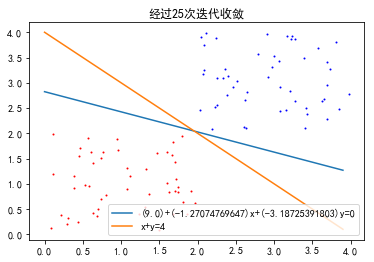

In [40]:
f(50)

(e)数据量修改为1000

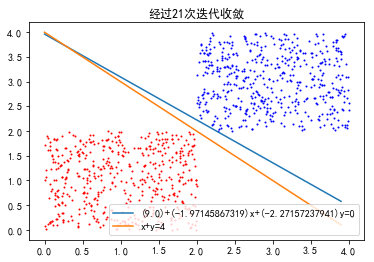

In [41]:
f(500)

(f)这里将数据修改为$R^{10}$

In [74]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#定义2n组m维数据的函数为g(n,m)
def g(n,m):
    #首先生成2n个可分的数据，生成两组，每一组有n个点，第一组点的每个分量属于[1,3],第二组点的每个分量属于[5,9],
    #第一组数据的标记为1，第二组的标记为-1,注意添加第一个分量为1
    #第一组点
    data1=[]
    #第二组点
    data2=[]
    for i in range(n):
        x1=[1]
        x2=[1]
        for j in range(m):
            x1.append(random.uniform(1,3))
            x2.append(random.uniform(5,9))
        x1.append(1)
        x2.append(-1)
        data1.append(np.array(x1))
        data2.append(np.array(x2))
    data=data1+data2
    #打乱数据顺序
    random.shuffle(data)

    #定义sign函数
    def sign(x):
        if x>=0:
            return 1
        else:
            return -1

    #定义判别函数，判断所有数据是否分类完成
    def Judge(x,w):
        flag=1
        for i in x:
            if sign(i[:m+1].dot(w))*i[-1]<0:
                flag=0
                break
        return flag    

    #记录次数
    s=0
    #初始化w
    w=np.zeros(m+1)
    while (Judge(data,w)==0):
        i=data[random.randint(0,2*n-1)]
        if sign(i[:m+1].dot(w))*i[-1]<0:
            w+=i[-1]*i[:m+1]
            s+=1
    return s

print("迭代次数为"+str(g(500,10)))

迭代次数为103


(g)重复(f)100次，做出直方图

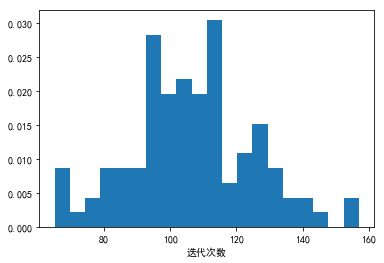

In [75]:
x=[]
for i in range(100):
    x.append(g(500,10))
plt.hist(x,20,normed=True)
plt.xlabel("迭代次数")
plt.show()

(h)总结下来，随$N$和$d$的增加，运行次数会增加

#### Problem 1.5 (Page 35)
The perceptron learning algorithm works like this: In each iteration $t$, pick a random $(x(t), y(t))$ and compute the 'signal ' $s(t) = w^T(t)x(t)$.
If $y(t).s(t)\le 0$, update $w$ by
$$
w(t + 1) = w(t) + y(t) · x(t)
$$
One may argue that this algorithm does not take the 'closeness' between $s(t)$
and $y(t)$ into consideration. Let's look at another perceptron learning algorithm: In each iteration, pick a random $(x(t), y(t))$ and compute $s(t)$. If $y(t) · s(t) \le 1$, update $w$ by 
$$
w(t + 1) = w(t) + \eta (y(t)-s(t)).x(t)
$$
where $\eta$ is a constant. That is, if $s(t)$ agrees with $y(t)$ well (their product is > 1), the algorithm does nothing. On the other hand, if $s(t)$ is further from $y(t)$, the algorithm changes $w(t)$ more. In this problem , you are asked to implement this algorithm and study its perfrmance.

(a) Generate a training data set of size 100 similar to that used in Exercise 1.4.Generate a test data set of size 10, 000 from the same process. To get $g$,
run the algorithm above with $\eta = 100$ on the training data set, until
a maximum of 1,000 updates has been reached. Plot the training data
set, the target function f, and the final hypothesis g on the same figure.
Report the error on the test set.  
(b) Use the data set in (a) and redo everything with $\eta = 1$.  
(c) Use the data set in (a) and redo everything with $\eta = 0.01$.  
(d) Use the data set in (a) and redo everything with $\eta = 0.0001$.  
(e) Compare the results that you get from (a) to (d) .  
The algorithm above is a variant of the so called Adaline ($Adaptive Linear
Neuron$) algorithm for perceptron learning.

(a)(b)(c)(d)这题的意思就是在更新的时候考虑"偏离距离"，并增加一个参数$\eta $，这里取二维平面上的点，下面通过编程实现一下。尝试的过程中发现$\eta$取100会导致数太大，所以这里取1,0.1,0.01,0.001

In [31]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


#定义函数GenerateData(n,low,up,w)，生成n组数据,每个分量的下界为low,上界为up,w为目标直线
def GenerateData(n,low,up,w):
    m=len(w)
    data=[]
    X1=np.array([])
    Y1=np.array([])
    X2=np.array([])
    Y2=np.array([])
    while(len(data)<n):
        x=np.array(1)
        x=np.append(x,np.random.uniform(low,up,size=m-1))
        if(x.dot(w)>=0.1):
            X1=np.append(X1,x[1])
            Y1=np.append(Y1,x[2])
            x=np.append(x,1)
        elif(x.dot(w)<=-0.1):
            X2=np.append(X2,x[1])
            Y2=np.append(Y2,x[2])
            x=np.append(x,-1)
        data.append(np.array(x))
    return data,X1,Y1,X2,Y2


#定义函数Adaline(n,m,k,w0,low,up,iteration=1000)，n组训练数据，m组测试数据，参数为k,w0为目标函数，iteration为迭代次数,
#数据每个分量下界为low,上界为up
def Adaline(n,m,k,w0,low,up,iteration=1000):
    d=len(w0)
    #首先生成n组训练数据
    data,X1,Y1,X2,Y2=GenerateData(n,low,up,w0)
    #测试数据集
    test=GenerateData(m,low,up,w0)[0]
    
    #定义sign函数
    def sign(x):
        if x>=0:
            return 1
        else:
            return -1
    
    #定义判别函数，判断所有数据是否分类完成
    def Judge(x,w):
        flag=1
        for i in x:
            if sign(i[:d].dot(w))*i[-1]<0:
                flag=0
                break
        return flag
    
    #记录次数
    T=0
    #初始化w,注意这里不能初始化为0
    w=np.ones(d)
    while(Judge(data,w)==0 and T<iteration):
        i=data[random.randint(0,n-1)]
        s=i[:d].dot(w)
        a=s*i[-1]
        if a<=1:
            w+=k*(i[-1]-s)*i[:d]
            T+=1
    
    #计算错误率
    error=0
    #print(type(test))
    for i in test:
        if sign(i[:3].dot(w))*i[-1]<0:
            error+=1
    print("n为"+str(k)+"时错误率为"+str(error/m))
    
    #直线方程为w0+w1*x+w2*y=0,根据此生成点
    X3=np.arange(low,up,0.01)
    Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

    #目标函数
    X4=np.arange(low,up,0.01)
    Y4=np.array([(X3[i]*w0[1]+w0[0])/(-w0[2]) for i in range(len(X4))])

    #画出图片
    plt.scatter(X1,Y1,c='r',s=1)
    plt.scatter(X2,Y2,c='b',s=1)
    plt.plot(X3,Y3,label="("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
    plt.plot(X4,Y4,label="("+str(w0[0])+")+("+str(w0[1])+")x+("+str(w0[2])+")y=0")
    plt.title(u"经过"+str(T)+u"次迭代")
    #设置坐标范围
    #plt.xticks(np.arange(0,10))
    #plt.yticks(np.arange(0,10))
    plt.legend()
    plt.show()

n为1时错误率为0.1369


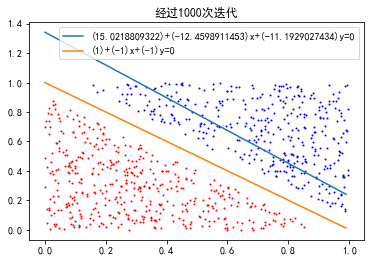

In [32]:
Adaline(1000,10000,1,np.array([1,-1,-1]),0,1)

n为0.1时错误率为0.0576


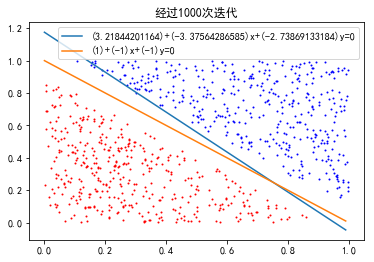

In [33]:
Adaline(1000,10000,0.1,np.array([1,-1,-1]),0,1)

n为0.01时错误率为0.0899


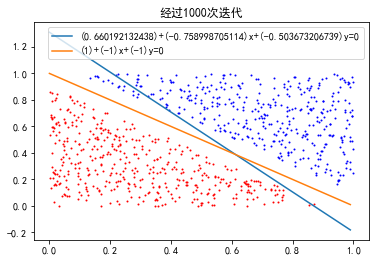

In [34]:
Adaline(1000,10000,0.01,np.array([1,-1,-1]),0,1)

n为0.001时错误率为0.3984


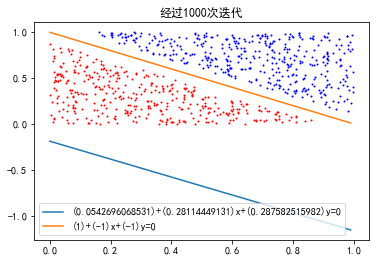

In [35]:
Adaline(1000,10000,0.001,np.array([1,-1,-1]),0,1)

(f)可以看到除了$\eta=0.001$的情形，其余几种错误率都很低，推测是因为$\eta=0.001$时，步长太小，需要更多的迭代。

#### Problem 1.6 (Page 35)
Consider a sample of 10 marbles drawn independently from a bin that holds red and green marbles. The probability of a red marble is $\mu$.For $\mu = 0.05, \mu = 0.5,$ and $\mu = 0.8$, compute the probability of getting no red
marbles $( v = 0)$ in the following cases.  
(a) We draw only one such sample. Compute the probability that $v = 0$.  
(b) We draw 1, 000 independent samples. Compute the probability that (at least) one of the samples has $v = 0$.  
(c) Repeat ( b) for 1 , 000, 000 independent samples. 

(a)抽出10个样本，$v=0$的概率为$P_0=(1-\mu)^{10}$

(b)重复(a)1000次，至少有一次出现$v=0$的概率为$P_1=1-(1-P_0)^{1000}$

(c)重复(a)1000,000次，至少有一次出现$v=0$的概率为$P_2=1-(1-P_0)^{1000000}$

#### Problem 1.7 (Page 36)
A sample of heads and tails is created by tossing a coin a number of times independently. Assume we have a number of coins that generate different samples independently. For a given coin , let the probability of heads (probability of error) be $\mu$. The probability of obtaining $k$ heads in $N$ tosses of this coin is given by the binomial distribution:
$$
P[k|N,\mu]=\binom{N}{k}\mu ^k(1-\mu)^{N-k}
$$
Remember that the training error $v$ is $\frac k N$.  

(a) Assume the sample size $(N)$ is $10$. If all the coins have $\mu = 0.05$. Compute the probability that at least one coin will have $v = 0$ for the case of 1 coin, 1,000 coins, 1,000,000 coins. Repeat for $\mu = 0.8$.  
(b) For the case $N = 6$ and $2$ coins with $\mu = 0.5$ for both coins, plot the probability
$$
P[ {max}_i |v_i - \mu _i| >\epsilon]
$$
for $\epsilon$ in the range $[0, 1]$ (the max is over coins) . On the same plot show the bound that would be obtained using the $Hoeffding\ Inequality$. Remember that for a single coin, the Hoeffding bound is
$$
P[| \mu-v|>\epsilon]\le 2e^{-2\epsilon ^2N}
$$
[Hint: Use $P[A\ or\ B] = P[A] + P[B]-P[A\ and\ B] = P[A] + P[B] -
P[A]P[B]$, where the last equality follows by independence, to evaluate P[max . . .]]


(a)这题和上一题应该是差不多的意思，和上一题的(c)稍有不同。这里$P_i$表示$i$个硬币时至少出现一次$v=0$的概率  
$$
P_1=(1-\mu)^{10}
\\P_{1000}=1-(1-P_1)^{1000}
\\P_{1000000}=1-(1-P_1)^{1000000}
$$

(b)注意$v=\frac k N，N=6$且有两枚硬币。因此
$$
\begin{aligned}
P[ {max}_i |v_i - \mu _i| >\epsilon]&=1-P[ {max}_i |v_i - \mu _i| \le\epsilon]
\\&=1-(P[|v - \mu| \le\epsilon])^2
\\&=1-(P[|\frac k N - 0.5| \le\epsilon])^2
\\&=1-(P[|k-3|\le 6\epsilon])^2
\\&=1-(P[3-6\epsilon\le k \le 3+6\epsilon])^2
\\&=1-(\sum_{3-6\epsilon\le k \le 3+6\epsilon}\binom{N}{k}\mu ^k(1-\mu)^{N-k})^2
\end{aligned}
$$

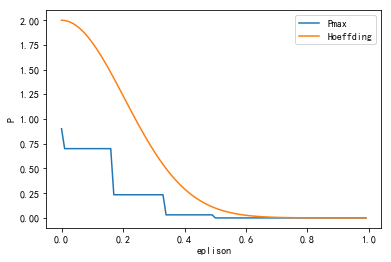

In [21]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def Pmax(N,x,u):
    low=int(3-6*x)
    up=int(3+6*x)
    s=0
    for k in range(low,up+1):
        s+=comb(N,k)*(u**k)*((1-u)**(N-k))
    return 1-s**2

x=np.arange(0,1,0.01)
y1=np.array([Pmax(6,i,0.5) for i in x])
y2=np.array([2*math.exp(-2*6*(i**2)) for i in x])

plt.plot(x,y1,label="Pmax")
plt.plot(x,y2,label="Hoeffding")
plt.xlabel("eplison")
plt.ylabel("P")
plt.legend()
plt.show()

#### Problem 1.8 (Page 36) 
The Hoeffding Inequality is one form of the $law\ of\ large\ numbers$. One of the simplest forms of that law is the $Chebyshev\ Inequality$,which you will prove here.

(a) If $t$ is a nonnegative random variable, prove that for any $\alpha > 0$,$P[t \ge \alpha] \ge \frac {E(t)}\alpha$  
(b) If $u$ is any random variable with mean $\mu$ and variance $\sigma ^2$ , prove that for any $\alpha > 0, P[(u-\mu)^2\ge \alpha]\le \frac{\sigma^2}\alpha$  [Hint: Use (a)]  
(c) If $u_1 ,..., u_N$ are iid random variables, each with mean $\mu$ and variance $\sigma^2$ ,and $u = \frac 1 N \sum_{n=1}^N{u_n}$ , prove that for any $\alpha > 0$,  
$$
P[(u-\mu)^2\ge \alpha]\le \frac{\sigma^2}{N\alpha}
$$
Notice that the RHS of this Chebyshev Inequality goes down linearly in N,while the counterpart in Hoeffding's Inequality goes down exponentially. In Problem 1 .9, we develop an exponential bound using a similar approach.

这题是有关切比雪夫不等式的，下面分别证明下  
(a)
$$
\begin{aligned}
P[t \ge \alpha]&=\int _{\alpha}^{+\infty}f(t)dt
\\&\le\int _{\alpha}^{+\infty}\frac t \alpha f(t)dt\ (注意t\ge \alpha)
\\&=\frac{\int _{\alpha}^{+\infty}t  f(t)dt} \alpha
\\&=\frac {E(t)}\alpha
\end{aligned}
$$
(b)在(a)中取$t=u-\mu$，注意此处$u$是随机变量，且
$$
E(u)=\mu,Var(u)=E(u-\mu)^2=\sigma^2
$$
所以由(a)
$$
P[(u-\mu)^2\ge \alpha]\le \frac {E((u-\mu)^2)}\alpha=\frac{\sigma^2}\alpha
$$
(c)
由随机变量的性质可得
$$
E(u) = E(\frac 1 N \sum_{n=1}^N{u_n})=\frac 1 N\sum_{n=1}^NE(u_n)=\mu
\\Var(u)=Var(\frac 1 N \sum_{n=1}^N{u_n})=\frac 1 {N^2}Var(\sum_{n=1}^N{u_n})=\frac 1 {N^2}N\sigma^2=\frac {\sigma^2}N
$$
带入(b)可得
$$
P[(u-\mu)^2\ge \alpha]\le \frac{\sigma^2}{N\alpha}
$$

#### Problem 1.9 (Page 37)
In this problem, we derive a form of the law of large numbers that has an exponential bound, called the $Cheroﬀ\ bound$. We focus on the simple case of flipping a fair coin, and use an approach similar to Problem 1.8.  

(a) Let $t$ be a (finite) random variable, $\alpha$ be a positive constant, and $s$ be a positive parameter. If $T(s) = E_t(e^{st})$ , prove that
$$
P[t \ge \alpha] \le e^{-s\alpha}T(s)
$$
[Hint: $e^{st}$ is monotonicaly increasing in $t$.]  
(b) Let $u_1 , · · · , u_N$ be iid random variables, and let $u = \frac 1 N \sum_{n=1}^N{u_n}$. If $U(s) = E_{u_n} (e^{su_n} ) $(for any n),prove that  
$$
P[u \ge \alpha] \le (e^{-s\alpha}U(s))^N
$$
(c) Suppose $P[u_n = 0] = P[u_n = 1] = \frac 1 2$ (fair coin). Evaluate $U(s)$ as a function of $s$, and minimize $e^{-s\alpha}U(s)$ with respect to $s$ for fixed $\alpha,0 < \alpha < 1$.  
(d) Conclude in (c) that, for $0 < \epsilon< \frac 1 2$ .
$$
P[u\ge E(u)+\epsilon]\le 2^{-\beta N }
$$
where $\beta= 1 + (\frac 1 2 + \epsilon)log_2(\frac 1 2 + \epsilon) + (\frac 1 2 - \epsilon)log_2(\frac 1 2 - \epsilon)$ and $E(u) = \frac 1 2 $·
Show that ( $\beta> 0$, hence the bound is exponentially decreasing in $N$.

(a)
$$
\begin{aligned}
P[t \ge \alpha]&=\int _{\alpha}^{+\infty}f(t)dt
\\&\le\int _{\alpha}^{+\infty}\frac {e^{st}} {e^{s\alpha}} f(t)dt\ (注意t\ge \alpha,s>0)
\\&={e^{-s\alpha}}{\int _{\alpha}^{+\infty}{e^{st}}  f(t)dt} 
\\&\le{e^{-s\alpha}}{\int _{-\infty}^{+\infty}{e^{st}}  f(t)dt} 
\\&=e^{-s\alpha}E_t(e^{st})
\\&=e^{-s\alpha}T(s)
\end{aligned}
$$

(b)令$U_N=\sum_{n=1}^N{u_n}$，因此$u=\frac 1 N U_N$  
所以
$$
\begin{aligned}
P[u \ge \alpha]&=P(\frac 1 N \sum_{n=1}^N{u_n} \ge \alpha)
\\&=P(\sum_{n=1}^N{u_n}\ge N\alpha)
\\&\le  e^{-sN\alpha}E(e^{s\sum_{n=1}^N{u_n}})(由(a))
\\&=e^{-sN\alpha} \prod _{n=1}^NE(e^{su_n})(由独立性)
\\&=e^{-sN\alpha} (U(s))^N
\\&=(e^{-s\alpha}U(s))^N
\end{aligned}
$$

(c)由定义知$U(s)=\frac 1 2 e^s+\frac 1 2$，所以$f(s)=e^{-s\alpha}U(s)=\frac 1 2(e^{(1-\alpha)s}+e^{-s\alpha})$
现在需要对固定的$\alpha$求$U(s)$的最小值
$$
f^{'}(s)=\frac 12[(1-\alpha)e^{(1-\alpha)s}-\alpha e^{-s\alpha} ]
\\f^{''}(s)=\frac 12[(1-\alpha)^2e^{(1-\alpha)s}+{\alpha}^2 e^{-s\alpha} ]>0
$$
所以当$f^{'}(s)=0$时，$f(s)$取到最小值。令$f^{'}(s)=0$得
$$
\frac 12[(1-\alpha)e^{(1-\alpha)s}-\alpha e^{-s\alpha} ]=0
\\e^s=\frac \alpha {1-\alpha}
\\s=ln(\frac \alpha {1-\alpha})
$$
因此
$$
\begin{aligned}
minf(s)&=f(ln(\frac \alpha {1-\alpha}))
\\&=\frac 1 2(\frac \alpha {1-\alpha})^{-\alpha}(\frac \alpha {1-\alpha}+1)
\\&=\frac 1 2 \frac {\alpha ^{-\alpha}}{(1-\alpha) ^{-\alpha+1}}
\end{aligned}
$$
因为$P[u \ge \alpha] \le (e^{-s\alpha}U(s))^N$对任意$s$均成立
所以
$$
P[u \ge \alpha] \le min(e^{-s\alpha}U(s))^N=(\frac 1 2 \frac {\alpha ^{-\alpha}}{(1-\alpha) ^{-\alpha+1}})^N
$$

(d)$P[u\ge E(u)+\epsilon]=P[u\ge \frac 1 2+\epsilon]$，在(c)的不等式中取$\alpha =\frac 1 2 +\epsilon$得
$$
\begin{aligned}
P[u\ge \frac 1 2+\epsilon]&\le(\frac 1 2 \frac {(\frac 1 2+\epsilon) ^{-(\frac 1 2+\epsilon)}}{(\frac 1 2-\epsilon) ^{\frac 1 2-\epsilon}})^N
\\&=2^{(-1-(\frac 1 2+\epsilon){log}_2(\frac 1 2+\epsilon)-(\frac 1 2-\epsilon){log}_2{(\frac 1 2-\epsilon)})N}
\\&=2^{-\beta N}
\end{aligned}
$$
下面证明
$$
\beta=\beta(\epsilon)= 1 + (\frac 1 2 + \epsilon)log_2(\frac 1 2 + \epsilon) + (\frac 1 2 - \epsilon)log_2(\frac 1 2 - \epsilon)>0
$$
$$
\begin{aligned}
\frac {d \beta}\epsilon&=log_2(\frac 1 2 + \epsilon)+1-log_2(\frac 1 2 - \epsilon)-1
\\&={log}_2 \frac {\frac 1 2 + \epsilon} {\frac 1 2 - \epsilon}>0
\end{aligned}
$$
因此$\beta$关于$\epsilon$递增，故$\beta>\beta(0)=0$

#### Problem 1.10 (Page 37)
Assume that $X = \{x_1 , x_2, . . . , x_N, x_{N+1} , . . . , x_{N+M}\}$
and $Y = \{-1, +1\}$ with an unknown target function $f : X \to Y$. The training
data set $D$ is $(x_1 , y_1) , . .  , (x_N, y_N)$ . Define the $off-training-set$ error of a
hypothesis h with respect to $f$ by
$$
E_{oﬀ} (h, f) =
\frac 1 M  \sum_{m=1}^M[\![h(x_{N+m}) \neq f(x_{N+m})]\!]
$$

(a) Say $f(x) = +1$ for all $x$ and
$$
h(x) = \begin {cases}
+1, for\ x = x_k\ and\ k\ is\ odd\ and\ 1\le k\le M + N
\\-1,otherwise
\end {cases}
$$
What is $E_{oﬀ} (h, f)$?  
(b) We say that a target function $f$ can 'generate' $D$ in a noiseless setting
if $y_n = f(x_n)$ for all $(x_n, y_n)\in D$ . For a fixed $D$ of size $N$, how many possible $f : X \to Y$ can generate $D$ in a noiseless setting?
(c) For a given hypothesis $h$ and an integer $k$ between $0$ and $M$, how many
of those $f$ in (b) satisfy $E_{oﬀ} (h, f)=\frac k M$ ?  
( d) For a given hypothesis $h$, if all those $f$ that generate $D$ in a noiseless setting are equally likely in probability, what is the expected off trainingset error $E_f[E_{oﬀ} (h, f)]$?  
(e) A deterministic algorithm $A$ is defined as a procedure that takes $D$ as an input, and outputs a hypothesis $h = A(D)$. Argue that for any two deterministic algorithms $A_1$ and $A_2$
$$
E_f[E_{oﬀ} (A_1(D), f)]=E_f[E_{oﬀ} (A_2(D), f)]
$$

You have now proved that in a noiseless setting, for a fixed $D$, if all possible $f$ are equally likely, any two deterministic algorithms are equivalent in terms of the expected off training set error. Similar results can be proved fr more general settings.

(a)由题设知$E_{oﬀ} (h, f)=\frac 1 M\sum_{m=1}^M[\![(N+m)被2整除]\!]$  
我们知道$1$到$N$中被2整除的正整数有$[\frac N 2]$个，$[]$为高斯函数，意思为向下取整
因此
$$
E_{oﬀ} (h, f)=\frac1 M[(1到N+M中被2整除的数的个数)-(1到N中被2整除的数的个数)]
=\frac1 M([\frac {N+M}2]-[\frac {N}2])
$$

(b)这题的意思是在训练集$D$上没有误差，在$\{x_{N+1} , . . . , x_{N+M}\}$上的取值就任意了，每个点有两种取值，所以一共有$2^M$种可以拟合的$f$

(c)一共有$M$个点，有$k$个点和目标函数不同，所以共有$C_M^k$种

(d)题目的假设意思应该是每个在训练集无噪声的$f$出现的概率是一样的，所以这些$f$在测试集上每个点出现错误的概率应该是一样的，那么由(c)以及(d)可知
$$
\begin{aligned}
E_f[E_{oﬀ} (h, f)]&=\sum_{k=0}^M\frac k M \frac {C_M^k}{2^M}
\\&=\frac {\sum_{k=0}^MkC_M^k}{M2^M}
\\&=\frac {\sum_{k=1}^M MC_{M-1}^{k-1}}{M2^M}
\\&=\frac {2^{M-1}}{2^M}
\\&=\frac 1 2
\end{aligned}
$$
注意这里用到了$kC_n^k=nC_{n-1}^{k-1}$

(e)由(d)直接推出

#### Problem 1.11 (Page 38)
The matrix which tabulates the cost of various errors for
the CIA and Supermarket applications in Example 1.1 is called a risk or loss
matrix.

For the two risk matrices in Example 1.1, explicitly write down the in sample error $E_{in}$ that one should minimize to obtain $g$.This in-sample error should weight the different types of errors based on the risk matrix. [Hint: Consider $y_n = +1$ and $y_n = - 1$ separately.]

![](https://github.com/Doraemonzzz/markdown-photo/blob/learning-from-data/C1P11.png?raw=true)

这里假设有$N$个样本

对于Suptermarket：
$$
\begin{aligned}
E_{in}&=\frac 1N \sum_{i=1}^{n}(10\times[\![h(x_n)=-1,  f(x_n)=1]\!]+1\times[\![h(x_n)=1,  f(x_n)=-1]\!])
\end{aligned}
$$

对于CIA：
$$
\begin{aligned}
E_{in}&=\frac 1N \sum_{i=1}^{n}(1\times[\![h(x_n)=-1,  f(x_n)=1]\!]+1000\times[\![h(x_n)=1,  f(x_n)=-1]\!])
\end{aligned}
$$

#### Problem 1.12 (Page 38)
This problem investigates how changing the error measure can change the result of the learning process. You have $N$ data points $y_1\le· · · \le y_N$ and wish to estimate a 'representative' value.

(a) If your algorithm is to find the hypothesis h that minimizes the in sample
sum of squared deviations,
$$
E_{in}(h) = \sum_{n=1}^N (h - y_n)^2,
$$
then show that your estimate will be the in sample mean,
$$
h_{mean} = \sum_{n=1}^Ny_n
$$

(b) If your algorithm is to find the hypothesis $h$ that minimizes the in sample
sum of absolute deviations,
$$
E_{in}(h) = \sum_{n=1}^N|h - y_n| ,
$$
then show that your estimate will be the in sample median h_{med} . which is any value for which half the data points are at most h_{med} and half the data points are at least $h_{med}$·

(c) Suppose $y_N$ is perturbed to $y_N + \epsilon$, where $\epsilon \to \infty$. So, the single data point $y_N$ becomes an outlier. What happens to your two estimators $h_{mean}$ and $h_{med}$?

(a)关于$h$求导可得
$$
E_{in}^{'}(h)=2\sum_{n=1}^N (h - y_n)
\\E_{in}^{''}(h)=2N>0
$$
所以$E_{in}(h)$在$E_{in}^{'}(h)=0$的取极小值，解得$h_{mean} =\frac 1 N \sum_{n=1}^Ny_n$

(b)这题证明一个一般结论：  
随机变量$x$的密度函数为$f(x)$,则使得$F(a)=\int _{-\infty}^{+\infty}|x-a|f(x)dx$达到最小值的$a$满足$\int _{-\infty}^{a}f(x)dx=\frac 1 2$，即$a$为该分布的中位数$x_{med}$。
证明：
首先
$$
F(a)=\int _{-\infty}^{a}(a-x)f(x)dx+\int _{a}^{\infty}(x-a)f(x)dx
$$
那么关于$a$求导得
$$
F^{'}(a)=\int _{-\infty}^{a}f(x)dx-\int _{a}^{\infty}f(x)dx
\\F^{''}(a)=2f(a)\ge0
$$
所以$F(a)$在$F^{'}(a)=0$处取最小值，即在$\int _{-\infty}^{a}f(x)dx=\int _{a}^{\infty}f(x)dx=\frac 12$处取最小值。最后一步是由$\int _{-\infty}^{a}f(x)dx+\int _{a}^{\infty}f(x)dx=1$得到。  
所以$F(a)$在$a=x_{med}$处取到最小值(离散分布同理可得)

回到原题，现在构造一个分布，使得$P(y=y_i)=\frac 1 N(i=1,2...N)$，所以
$$
F(h)=\frac 1 NE_{in}(h) =\frac 1N \sum_{n=1}^N|h - y_n|
$$
因此由之前结论知道$E_{in}(h)$在$h=y_{med}$取最小值

(c)当$y_N$被污染为 $y_N + \epsilon,(\epsilon \to \infty)$时，由定义可知$h_{mean}\to \infty$,而$y_{med}$为中位数，则不会有太大变化，因为元素的相对次序只有$y_N$变了